In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)

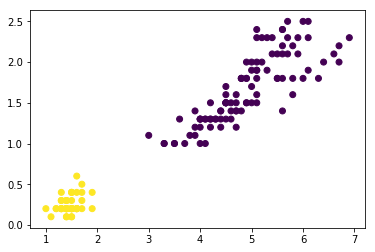

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [5]:
weights = [random.random() for i in range(3)]
weights        

[0.5968051480514632, 0.13767256416115148, 0.8459668746572749]

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
outputs = np.zeros(len(X_train))
for i in range(len(X_train)):
    outputs[i] = X_train[i][0]*weights[0]+X_train[i][1]*weights[1]+weights[2]
    

In [8]:
binary_outputs = [sigmoid(i) for i in outputs]

In [9]:
def iteration_error(d,y):
    error = 0
    for i in range(len(d)):
        error += np.abs(d[i]-y[i])
    return error/len(d)    

In [10]:
iteration_error(binary_outputs,y_train)

0.7095793753726715

In [11]:
threshold = 0.01

In [12]:
alpha = 0.1
new_outputs = copy.copy(binary_outputs)
new_binary_outputs = copy.copy(binary_outputs)
new_weights = copy.copy(weights)
k=0
while iteration_error(new_binary_outputs,y_train)>threshold:
    for i in range(len(X_train)):
        new_weights[0] -= alpha*(new_binary_outputs[i]-y_train[i])*X_train[i][0] 
        new_weights[1] -= alpha*(new_binary_outputs[i]-y_train[i])*X_train[i][1]
        new_weights[2] -= alpha*(new_binary_outputs[i]-y_train[i])
    for i in range(len(X_train)):
        new_outputs[i] = X_train[i][0]*new_weights[0]+X_train[i][1]*new_weights[1]+new_weights[2]
    new_binary_outputs = [sigmoid(j) for j in new_outputs] 
    k+=1


In [13]:
def binary_classifier(x):
    if x<0.5:
        return 0
    else:
        return 1

In [14]:
final_outputs = [binary_classifier(i) for i in new_binary_outputs]

In [15]:
#difference between output and training values
final_outputs - y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
iteration_error(new_binary_outputs,y_train)

0.0003292463902313959

In [18]:
test_output = [sigmoid(X_test[i][0]*new_weights[0]+X_test[i][1]*new_weights[1]+new_weights[2]) for i in range(len(X_test))]
test_output_binary = [binary_classifier(sigmoid(X_test[i][0]*new_weights[0]+X_test[i][1]*new_weights[1]+new_weights[2])) for i in range(len(X_test))]

In [19]:
#difference for test set
test_output_binary - y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
iteration_error(test_output,y_test)

0.0006034231231384006